In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def conv_to_z(num: int):
    return float("0." + str(num))
    

# Метод середины квадрата

In [4]:
def mid_square_method(base_num, count: int, result_container: [str] = []):
    orig_len = len(str(base_num))
    base_num = int(base_num)
    base_num = pow(base_num, 2)
    base_num_str = str(base_num)
    
    while len(base_num_str) < orig_len * 2:
        base_num_str = "0" + base_num_str
    new_len = len(base_num_str)
    offset = int((new_len - orig_len) / 2)
    new_num_str = base_num_str[offset:orig_len + offset]
   # print(base_num_str, ' ', new_num_str)
    result_container.append(new_num_str)
    count -= 1
    if count:
        mid_square_method(new_num_str, count, result_container)
    else:
        return
    

In [5]:
def conv_res(res):
    res_z = []
    for num in res:
        z = conv_to_z(num)
        res_z.append(z)
    return res_z

# Мультипликативный конгруэнтный метод

In [6]:
def mul_cong_method(base_a: int, k: int, m: int, a_res: [int], result_container: [int]):
    for i in range(m - 1):
        new_a = (k * base_a) % m # Ai = (k * A(i-1)) mod m
        #print(f"{new_a} = ({k} * {base_a}) mod {m}")
        result_container.append(new_a / m)
        a_res.append(new_a)
        base_a = new_a

# Тестирование равномерности и независимости

In [7]:
def uni_test(K: int, nums: [float]):
    interval_size = 1 / K

    tmp = np.zeros(K)
    l = 0.0
    r = interval_size
    
    for i in range(K):
        for j in nums:
            if j >= l and j < r:
                tmp[i] += 1
        l += interval_size
        r += interval_size

    tmp_x = np.arange(0.0, 1.0 + interval_size, interval_size)
    x = [i for i in np.arange(0.0, 1.0, interval_size)]

    freq = tmp / len(nums)
    print('Frequencies: ', freq)

    math_exp = calc_math_exp(nums)
    print('Mathematical expectation = ', math_exp, ' -> 0.5')

    disp = calc_disp(nums)
    print('Dispersion = ', disp, ' -> 0.08333...')

    R = calc_R(3, nums)
    print('Correlation = ', R)
    
    plt.xlabel('Value Ranges')
    plt.ylabel('Frequency')
    plt.axhline(y=interval_size, color="#E74C3C")
   # plt.hist(freq, bins=tmp_x, color='#7D3C98', alpha=0.7, rwidth=0.85)
    plt.hist(x, weights=freq, bins=tmp_x, color='#48C9B0', alpha=0.7, rwidth=0.85)
    plt.show()

In [8]:
# Mathematical expectation
def calc_math_exp(z: [float]):
    math_exp = 0.0
    for z_i in z:
        math_exp += z_i
    math_exp /= len(z)
    return math_exp

# Dispersion 
def calc_disp(z: [float]):
    me = calc_math_exp(z)
    z_p = [pow(z_i, 2) for z_i in z]
    me_z_p = calc_math_exp(z_p)
    disp = me_z_p - pow(me, 2)
    return disp

# Correlation
def calc_R(s, nums):
    n = len(nums)
    x = []
    y = []
    for i in range(n - s):
        x.append(nums[i])
        y.append(nums[i + s])
    xy = [(x[i] * y[i]) for i in range(len(x))]
    m_xy = calc_math_exp(xy)
    m_x = calc_math_exp(x)
    m_y = calc_math_exp(y)
    disp_x = calc_disp(x)
    disp_y = calc_disp(y)

    R = (m_xy - m_x * m_y) / ( math.sqrt(disp_x * disp_y) )
    r1 = 12 * m_xy - 3
    return R


Frequencies:  [0.16 0.12 0.18 0.06 0.08 0.1  0.1  0.1  0.   0.1 ]
Mathematical expectation =  0.41595476000000015  -> 0.5
Dispersion =  0.08552428943894233  -> 0.08333...
Correlation =  0.04469289890350535


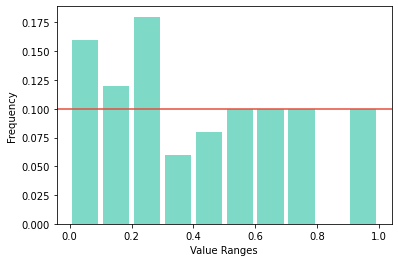

Frequencies:  [0.11 0.16 0.12 0.08 0.08 0.1  0.08 0.13 0.06 0.08]
Mathematical expectation =  0.4554222399999999  -> 0.5
Dispersion =  0.08357025212424266  -> 0.08333...
Correlation =  0.062351166693761194


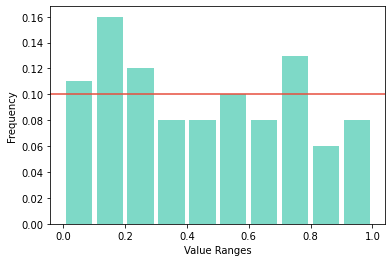

Frequencies:  [0.102 0.128 0.076 0.108 0.08  0.098 0.088 0.116 0.102 0.102]
Mathematical expectation =  0.4984161280000002  -> 0.5
Dispersion =  0.08744740053553551  -> 0.08333...
Correlation =  0.030927751874613652


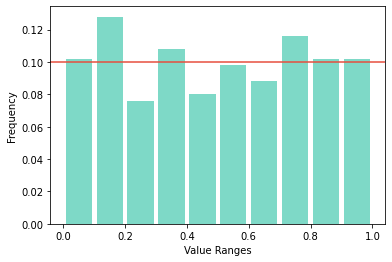

Frequencies:  [0.105 0.12  0.068 0.107 0.082 0.093 0.099 0.126 0.101 0.099]
Mathematical expectation =  0.5027027870000003  -> 0.5
Dispersion =  0.08665835518910386  -> 0.08333...
Correlation =  0.026620469879272465


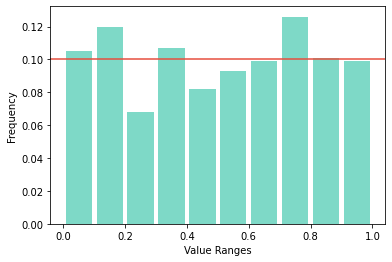

In [9]:
res = []
mid_square_method(347806, 50, res)
res_z = conv_res(res)

uni_test(10, res_z)

res = []
mid_square_method(347806, 100, res)
res_z = conv_res(res)

uni_test(10, res_z)

res = []
mid_square_method(347806, 500, res)
res_z = conv_res(res)

uni_test(10, res_z)

res = []
mid_square_method(347806, 1000, res)
res_z = conv_res(res)

uni_test(10, res_z)

Frequencies:  [0.10381184 0.10705596 0.10786699 0.07461476 0.10705596 0.10705596
 0.07461476 0.10705596 0.10705596 0.10381184]
Mathematical expectation =  0.4997693099409665  -> 0.5
Dispersion =  0.08787763684232533  -> 0.08333...
Correlation =  0.05365280756473537


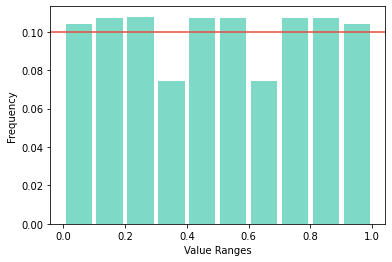

Frequencies:  [0.0999514 0.1000324 0.1000324 0.0999514 0.1000324 0.1000324 0.0999514
 0.1000324 0.1000324 0.0999514]
Mathematical expectation =  0.500000000000003  -> 0.5
Dispersion =  0.08331983477767524  -> 0.08333...
Correlation =  -0.0025907322457164365


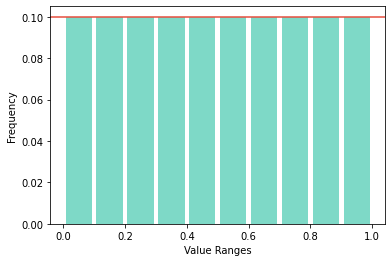

In [13]:
res = []
a_res = []
mul_cong_method(25, 60, 1234, a_res, res)
uni_test(10, res)

res = []
a_res = []
mul_cong_method(25, 60, 12347, a_res, res)
uni_test(10, res)